<a href="https://colab.research.google.com/github/LouisKimDev/MobilityVisionSystem/blob/main/MVS_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

img_1 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/MVS/MVS_final_project/left-images/view.png")
gray_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)

img_2 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/MVS/MVS_final_project/right-images/view.png")
gray_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

Q1. Disparity Map 생성

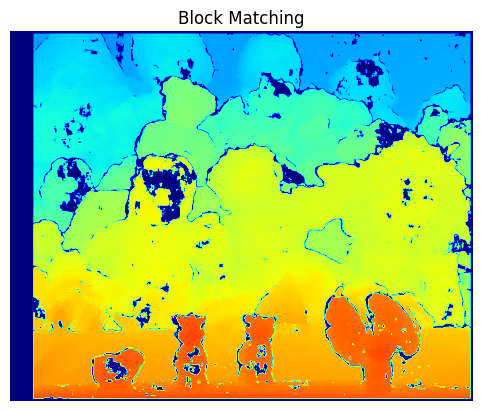

In [ ]:
# OpenCV에서 Block Matching 기반 dispairty map 추출

stereo = cv2.StereoBM_create(numDisparities = 64, blockSize = 15)
dispairty_BM = stereo.compute(gray_1, gray_2)
plt.imshow(dispairty_BM, 'jet')
plt.axis('off')
plt.title('Block Matching')
plt.show()


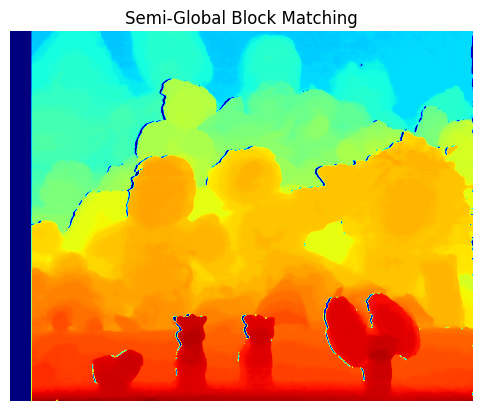

In [ ]:
# OpenCV에서 Semi Global Block Matching 기반 Disparity Map 추출

# stereo = cv2.StereoSGBM_create(numDisparities = 80, blockSize = 11)

num_disp = 64           # divided by 16
block_size = 11          # odd numer >= 1 3-11
disp12MaxDiff = 0       #
uniquenessRatio = 5     # 5-15
speckleWindowSize = 100   # 5-200
speckleRange = 2       # 1 - 2

stereo = cv2.StereoSGBM_create(
    numDisparities = num_disp,
    blockSize = block_size,
    uniquenessRatio = uniquenessRatio,
    speckleWindowSize = speckleWindowSize,
    speckleRange = speckleRange,
    disp12MaxDiff = disp12MaxDiff,
    P1 = 8 * 1 * block_size * block_size,
    P2 = 32 * 1 * block_size * block_size,
)

dispairty_SGBM = stereo.compute(gray_1, gray_2)
plt.imshow(dispairty_SGBM, 'jet')
plt.axis('off')
plt.title('Semi-Global Block Matching')
plt.show()


위 두개 외에 다른 방법으로 dispairty map 추출
  - OpenCV함수 사용 X
  - 기존의 연구논문에서 활용한 방법 사용 또는 본인의 아이디어

위 두개 외에 다른 방법으로 Disparity Map 추출(OpenCV 함수 사용 x, 기존 연구논문 활용 or 자신의 아이디어)

In [ ]:
smoothing_mask = np.array([[1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16]])
sharpening_mask1 = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpening_mask2 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

Sharp_1 = cv2.filter2D(gray_1, -1, sharpening_mask2)
Sharp_2 = cv2.filter2D(gray_2, -1, sharpening_mask2)

Smooth_1 = cv2.filter2D(gray_1, -1, smoothing_mask)
Smooth_2 = cv2.filter2D(gray_2, -1, smoothing_mask)

Smooth_3 = cv2.filter2D(Smooth_1, -1, smoothing_mask)
Smooth_4 = cv2.filter2D(Smooth_2, -1, smoothing_mask)

Gauss_1 = cv2.GaussianBlur(gray_1, (0,0), 1)
Gauss_2 = cv2.GaussianBlur(gray_2, (0,0), 1)



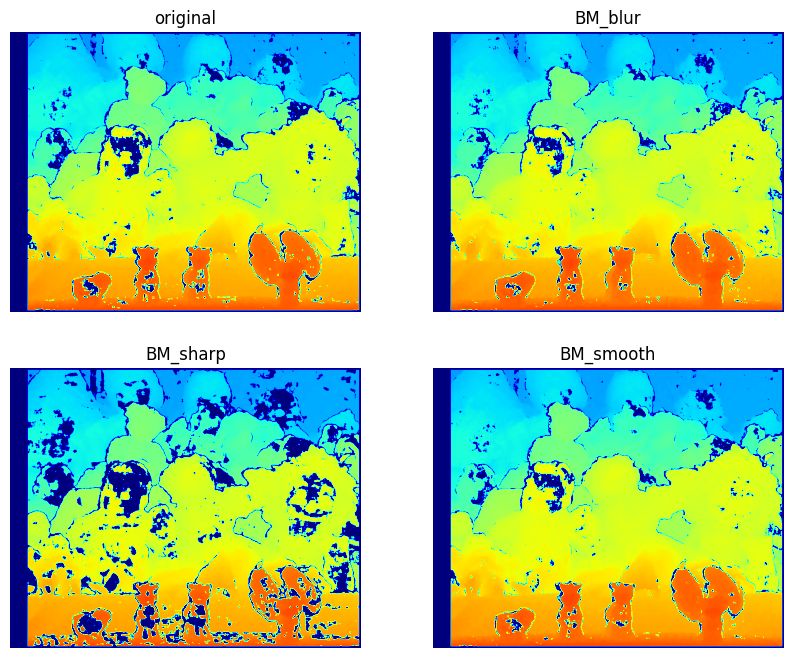

In [ ]:
# smooth 필터를 통과한 BM 이미지

stereo = cv2.StereoBM_create(numDisparities = 64, blockSize = 15)
dispairty_BM_smooth = stereo.compute(Smooth_1, Smooth_2)
dispairty_BM_sharp = stereo.compute(Sharp_1, Sharp_2)
dispairty_BM_gauss = stereo.compute(Gauss_1, Gauss_2)

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.title('original')
plt.axis('off')
plt.imshow(dispairty_BM, 'jet')
plt.subplot(2,2,2)
plt.title('BM_blur')
plt.axis('off')
plt.imshow(dispairty_BM_gauss, 'jet')
plt.subplot(2,2,3)
plt.title('BM_sharp')
plt.axis('off')
plt.imshow(dispairty_BM_sharp, 'jet')
plt.subplot(2,2,4)
plt.title('BM_smooth')
plt.axis('off')
plt.imshow(dispairty_BM_smooth, 'jet')
plt.show()

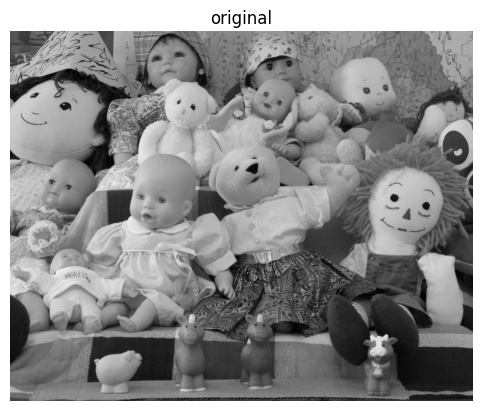

In [ ]:
plt.title('original')
plt.axis('off')
plt.imshow(gray_1, 'gray')

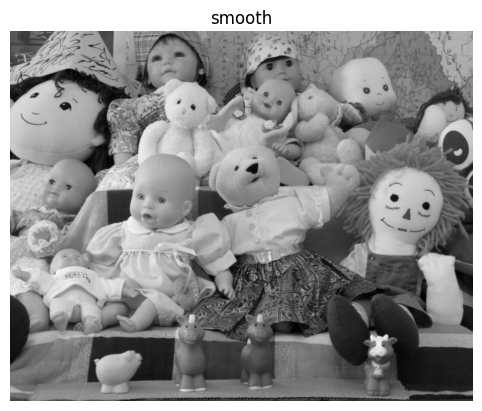

In [ ]:
plt.title('smooth')
plt.axis('off')
plt.imshow(Smooth_1, 'gray')

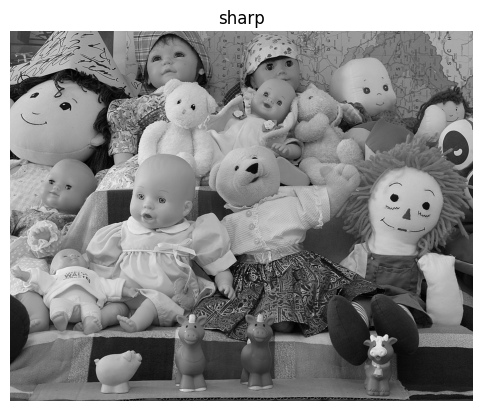

In [ ]:
plt.title('sharp')
plt.axis('off')
plt.imshow(Sharp_1, 'gray')

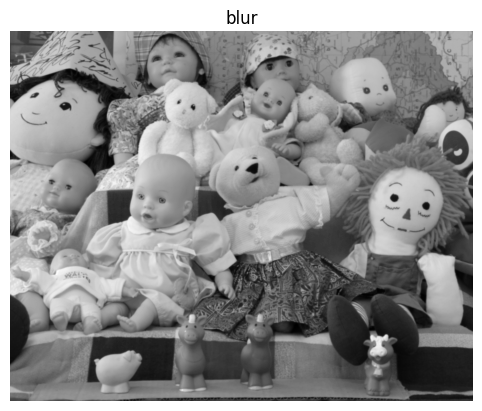

In [ ]:
plt.title('blur')
plt.axis('off')
plt.imshow(Gauss_1, 'gray')
plt.show()

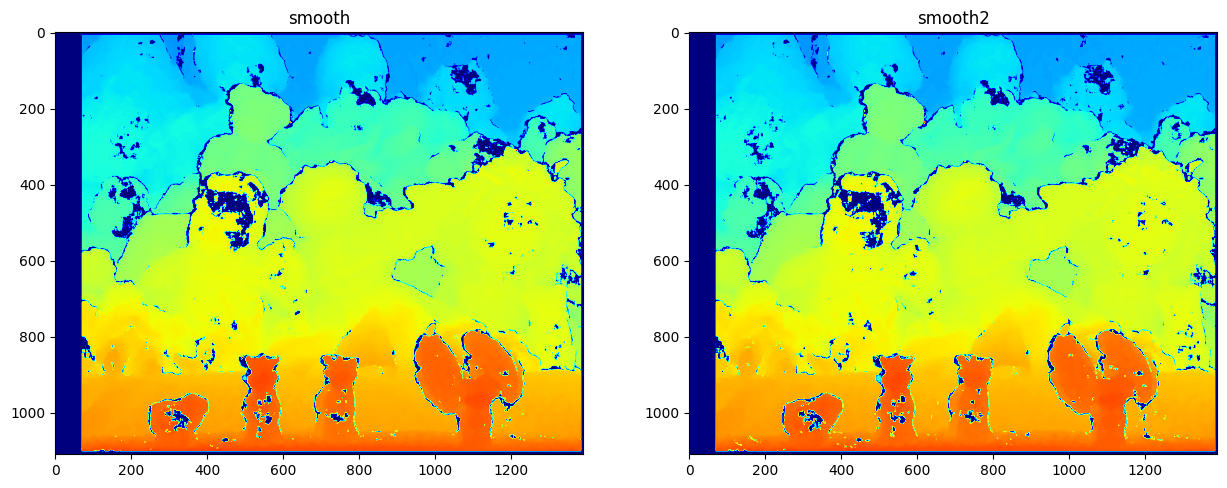

In [ ]:
# smooth 필터를 두 번 통과한 BM 이미지

stereo = cv2.StereoBM_create(numDisparities = 64, blockSize = 15)
dispairty_BM_smooth2 = stereo.compute(Smooth_3, Smooth_4)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.title('smooth')
plt.imshow(dispairty_BM_smooth, 'jet')
plt.subplot(1,2,2)
plt.title('smooth2')
plt.imshow(dispairty_BM_smooth2, 'jet')

plt.show()

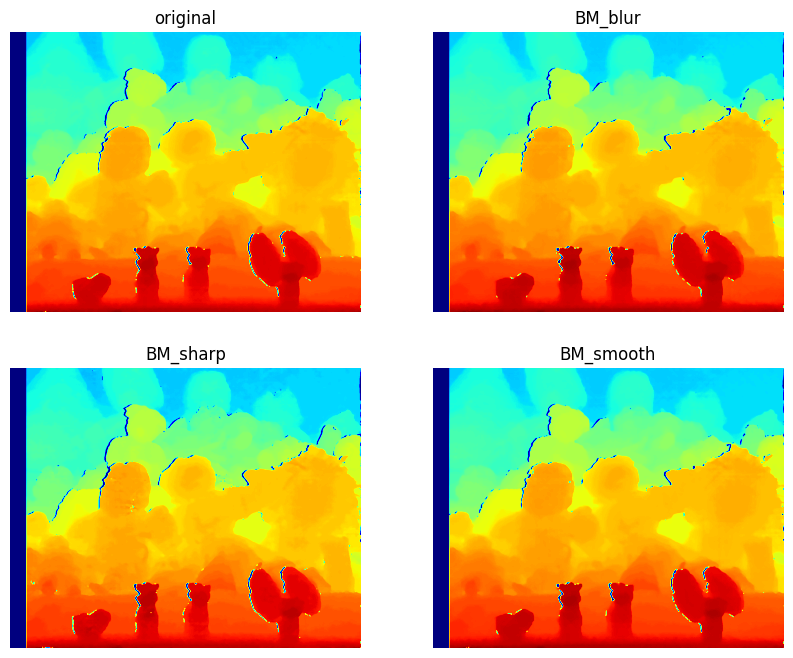

In [ ]:
# smooth 필터를 통한 SGBM
num_disp = 64           # divided by 16
block_size = 11          # odd numer >= 1 3-11
disp12MaxDiff = 0       #
uniquenessRatio = 5     # 5-15
speckleWindowSize = 100   # 5-200
speckleRange = 2       # 1 - 2

stereo = cv2.StereoSGBM_create(
    numDisparities = num_disp,
    blockSize = block_size,
    uniquenessRatio = uniquenessRatio,
    speckleWindowSize = speckleWindowSize,
    speckleRange = speckleRange,
    disp12MaxDiff = disp12MaxDiff,
    P1 = 8 * 1 * block_size * block_size,
    P2 = 32 * 1 * block_size * block_size,
)

dispairty_SGBM = stereo.compute(gray_1, gray_2)
dispairty_SGBM_smooth = stereo.compute(Smooth_1, Smooth_2)
dispairty_SGBM_sharp = stereo.compute(Sharp_1, Sharp_2)
dispairty_SGBM_gauss = stereo.compute(Gauss_1, Gauss_2)

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.title('original')
plt.axis('off')
plt.imshow(dispairty_SGBM, 'jet')
plt.subplot(2,2,2)
plt.title('BM_blur')
plt.axis('off')
plt.imshow(dispairty_SGBM_gauss, 'jet')
plt.subplot(2,2,3)
plt.title('BM_sharp')
plt.axis('off')
plt.imshow(dispairty_SGBM_sharp, 'jet')
plt.subplot(2,2,4)
plt.title('BM_smooth')
plt.axis('off')
plt.imshow(dispairty_SGBM_smooth, 'jet')
plt.show()

In [ ]:
import cv2
import numpy as np

# Ground Truth disparity map 읽기
ground_truth = cv2.imread('/content/drive/MyDrive/Colab Notebooks/MVS/MVS_final_project/GoundTruth/disp1.png', cv2.IMREAD_GRAYSCALE)

# 다양한 알고리즘으로 얻은 disparity map 읽기
algorithm_disparity = dispairty_SGBM
print(ground_truth.shape)
print(algorithm_disparity.shape)
ground_truth = ground_truth.astype(np.float32)
algorithm_disparity = algorithm_disparity.astype(np.float32)

# 오차 측정
abs_diff = cv2.absdiff(algorithm_disparity, ground_truth)
squared_diff = np.square(algorithm_disparity - ground_truth)


# 오차 맵 생성
error_map = cv2.cvtColor(abs_diff, cv2.COLOR_GRAY2BGR)
error_map[..., 2] = 0  # 오차 맵을 빨간색으로 표시하기 위해, 파란색 및 녹색 채널을 0으로 설정

# 정확도 지표 계산
mean_error = np.mean(abs_diff)
std_deviation = np.std(abs_diff)
max_error = np.max(abs_diff)

# 결과 출력
print('Mean Error:', mean_error)
print('Standard Deviation:', std_deviation)
print('Maximum Error:', max_error)
cv2.waitKey(0)
cv2.destroyAllWindows()



(1110, 1390)
(1110, 1390)
Mean Error: 404.2056
Standard Deviation: 138.16406
Maximum Error: 871.0


In [ ]:
import cv2
import numpy as np

# Ground Truth disparity map 읽기
ground_truth = cv2.imread('/content/drive/MyDrive/Colab Notebooks/MVS/MVS_final_project/GoundTruth/disp1.png', cv2.IMREAD_GRAYSCALE)

# 다양한 알고리즘으로 얻은 disparity map 읽기
algorithm_disparity = dispairty_SGBM_smooth
print(ground_truth.shape)
print(algorithm_disparity.shape)
ground_truth = ground_truth.astype(np.float32)
algorithm_disparity = algorithm_disparity.astype(np.float32)

# 오차 측정
abs_diff = cv2.absdiff(algorithm_disparity, ground_truth)
squared_diff = np.square(algorithm_disparity - ground_truth)


# 오차 맵 생성
error_map = cv2.cvtColor(abs_diff, cv2.COLOR_GRAY2BGR)
error_map[..., 2] = 0  # 오차 맵을 빨간색으로 표시하기 위해, 파란색 및 녹색 채널을 0으로 설정

# 정확도 지표 계산
mean_error = np.mean(abs_diff)
std_deviation = np.std(abs_diff)
max_error = np.max(abs_diff)

# 결과 출력
print('Mean Error:', mean_error)
print('Standard Deviation:', std_deviation)
print('Maximum Error:', max_error)
cv2.waitKey(0)
cv2.destroyAllWindows()

(1110, 1390)
(1110, 1390)
Mean Error: 404.11792
Standard Deviation: 137.99649
Maximum Error: 868.0


In [ ]:
import cv2
import numpy as np

# Ground Truth disparity map 읽기
ground_truth = cv2.imread('/content/drive/MyDrive/Colab Notebooks/MVS/MVS_final_project/GoundTruth/disp1.png', cv2.IMREAD_GRAYSCALE)

# 다양한 알고리즘으로 얻은 disparity map 읽기
algorithm_disparity = dispairty_SGBM_gauss
print(ground_truth.shape)
print(algorithm_disparity.shape)
ground_truth = ground_truth.astype(np.float32)
algorithm_disparity = algorithm_disparity.astype(np.float32)

# 오차 측정
abs_diff = cv2.absdiff(algorithm_disparity, ground_truth)
squared_diff = np.square(algorithm_disparity - ground_truth)


# 오차 맵 생성
error_map = cv2.cvtColor(abs_diff, cv2.COLOR_GRAY2BGR)
error_map[..., 2] = 0  # 오차 맵을 빨간색으로 표시하기 위해, 파란색 및 녹색 채널을 0으로 설정

# 정확도 지표 계산
mean_error = np.mean(abs_diff)
std_deviation = np.std(abs_diff)
max_error = np.max(abs_diff)

# 결과 출력
print('Mean Error:', mean_error)
print('Standard Deviation:', std_deviation)
print('Maximum Error:', max_error)
cv2.waitKey(0)
cv2.destroyAllWindows()

(1110, 1390)
(1110, 1390)
Mean Error: 404.03513
Standard Deviation: 137.9143
Maximum Error: 865.0


In [ ]:
import cv2
import numpy as np

# Ground Truth disparity map 읽기
ground_truth = cv2.imread('/content/drive/MyDrive/Colab Notebooks/MVS/MVS_final_project/GoundTruth/disp1.png', cv2.IMREAD_GRAYSCALE)

# 다양한 알고리즘으로 얻은 disparity map 읽기
algorithm_disparity = dispairty_SGBM_sharp
print(ground_truth.shape)
print(algorithm_disparity.shape)
ground_truth = ground_truth.astype(np.float32)
algorithm_disparity = algorithm_disparity.astype(np.float32)

# 오차 측정
abs_diff = cv2.absdiff(algorithm_disparity, ground_truth)
squared_diff = np.square(algorithm_disparity - ground_truth)


# 오차 맵 생성
error_map = cv2.cvtColor(abs_diff, cv2.COLOR_GRAY2BGR)
error_map[..., 2] = 0  # 오차 맵을 빨간색으로 표시하기 위해, 파란색 및 녹색 채널을 0으로 설정

# 정확도 지표 계산
mean_error = np.mean(abs_diff)
std_deviation = np.std(abs_diff)
max_error = np.max(abs_diff)

# 결과 출력
print('Mean Error:', mean_error)
print('Standard Deviation:', std_deviation)
print('Maximum Error:', max_error)
cv2.waitKey(0)
cv2.destroyAllWindows()

(1110, 1390)
(1110, 1390)
Mean Error: 404.1998
Standard Deviation: 138.54225
Maximum Error: 875.0


In [ ]:
import cv2
import numpy as np

# Ground Truth disparity map 읽기
ground_truth = cv2.imread('/content/drive/MyDrive/Colab Notebooks/MVS/MVS_final_project/GoundTruth/disp1.png', cv2.IMREAD_GRAYSCALE)

# 다양한 알고리즘으로 얻은 disparity map 읽기
algorithm_disparity = dispairty_BM
print(ground_truth.shape)
print(algorithm_disparity.shape)
ground_truth = ground_truth.astype(np.float32)
algorithm_disparity = algorithm_disparity.astype(np.float32)

# 오차 측정
abs_diff = cv2.absdiff(algorithm_disparity, ground_truth)
squared_diff = np.square(algorithm_disparity - ground_truth)


# 오차 맵 생성
error_map = cv2.cvtColor(abs_diff, cv2.COLOR_GRAY2BGR)
error_map[..., 2] = 0  # 오차 맵을 빨간색으로 표시하기 위해, 파란색 및 녹색 채널을 0으로 설정

# 정확도 지표 계산
mean_error = np.mean(abs_diff)
std_deviation = np.std(abs_diff)
max_error = np.max(abs_diff)

# 결과 출력
print('Mean Error:', mean_error)
print('Standard Deviation:', std_deviation)
print('Maximum Error:', max_error)
cv2.waitKey(0)
cv2.destroyAllWindows()

(1110, 1390)
(1110, 1390)
Mean Error: 387.2213
Standard Deviation: 149.45767
Maximum Error: 942.0


In [ ]:
import cv2
import numpy as np

# Ground Truth disparity map 읽기
ground_truth = cv2.imread('/content/drive/MyDrive/Colab Notebooks/MVS/MVS_final_project/GoundTruth/disp1.png', cv2.IMREAD_GRAYSCALE)

# 다양한 알고리즘으로 얻은 disparity map 읽기
algorithm_disparity = dispairty_BM_smooth
print(ground_truth.shape)
print(algorithm_disparity.shape)
ground_truth = ground_truth.astype(np.float32)
algorithm_disparity = algorithm_disparity.astype(np.float32)

# 오차 측정
abs_diff = cv2.absdiff(algorithm_disparity, ground_truth)
squared_diff = np.square(algorithm_disparity - ground_truth)


# 오차 맵 생성
error_map = cv2.cvtColor(abs_diff, cv2.COLOR_GRAY2BGR)
error_map[..., 2] = 0  # 오차 맵을 빨간색으로 표시하기 위해, 파란색 및 녹색 채널을 0으로 설정

# 정확도 지표 계산
mean_error = np.mean(abs_diff)
std_deviation = np.std(abs_diff)
max_error = np.max(abs_diff)

# 결과 출력
print('Mean Error:', mean_error)
print('Standard Deviation:', std_deviation)
print('Maximum Error:', max_error)
cv2.waitKey(0)
cv2.destroyAllWindows()

(1110, 1390)
(1110, 1390)
Mean Error: 390.81427
Standard Deviation: 147.77766
Maximum Error: 942.0


In [ ]:
import cv2
import numpy as np

# Ground Truth disparity map 읽기
ground_truth = cv2.imread('/content/drive/MyDrive/Colab Notebooks/MVS/MVS_final_project/GoundTruth/disp1.png', cv2.IMREAD_GRAYSCALE)

# 다양한 알고리즘으로 얻은 disparity map 읽기
algorithm_disparity = dispairty_BM_sharp
print(ground_truth.shape)
print(algorithm_disparity.shape)
ground_truth = ground_truth.astype(np.float32)
algorithm_disparity = algorithm_disparity.astype(np.float32)

# 오차 측정
abs_diff = cv2.absdiff(algorithm_disparity, ground_truth)
squared_diff = np.square(algorithm_disparity - ground_truth)


# 오차 맵 생성
error_map = cv2.cvtColor(abs_diff, cv2.COLOR_GRAY2BGR)
error_map[..., 2] = 0  # 오차 맵을 빨간색으로 표시하기 위해, 파란색 및 녹색 채널을 0으로 설정

# 정확도 지표 계산
mean_error = np.mean(abs_diff)
std_deviation = np.std(abs_diff)
max_error = np.max(abs_diff)

# 결과 출력
print('Mean Error:', mean_error)
print('Standard Deviation:', std_deviation)
print('Maximum Error:', max_error)
cv2.waitKey(0)
cv2.destroyAllWindows()

(1110, 1390)
(1110, 1390)
Mean Error: 359.7382
Standard Deviation: 158.15604
Maximum Error: 920.0


In [ ]:
import cv2
import numpy as np

# Ground Truth disparity map 읽기
ground_truth = cv2.imread('/content/drive/MyDrive/Colab Notebooks/MVS/MVS_final_project/GoundTruth/disp1.png', cv2.IMREAD_GRAYSCALE)

# 다양한 알고리즘으로 얻은 disparity map 읽기
algorithm_disparity = dispairty_BM_gauss
print(ground_truth.shape)
print(algorithm_disparity.shape)
ground_truth = ground_truth.astype(np.float32)
algorithm_disparity = algorithm_disparity.astype(np.float32)

# 오차 측정
abs_diff = cv2.absdiff(algorithm_disparity, ground_truth)
squared_diff = np.square(algorithm_disparity - ground_truth)


# 오차 맵 생성
error_map = cv2.cvtColor(abs_diff, cv2.COLOR_GRAY2BGR)
error_map[..., 2] = 0  # 오차 맵을 빨간색으로 표시하기 위해, 파란색 및 녹색 채널을 0으로 설정

# 정확도 지표 계산
mean_error = np.mean(abs_diff)
std_deviation = np.std(abs_diff)
max_error = np.max(abs_diff)

# 결과 출력
print('Mean Error:', mean_error)
print('Standard Deviation:', std_deviation)
print('Maximum Error:', max_error)
cv2.waitKey(0)
cv2.destroyAllWindows()

(1110, 1390)
(1110, 1390)
Mean Error: 391.79987
Standard Deviation: 147.34254
Maximum Error: 942.0
